# `ES 157` Section X: Playing with probability

As the notebooks will become more sporadic from now on, to avoid confusion we will switch the naming convention (to, sometimes, something more playful).

So, in this notebook we will play around with concepts from probability, see a few distributions, and work with a famous problem from probability.

At the end of this notebook you will
1. have used `numpy` to interact with probability distributions,
2. have used `numpy` and `python` to code problems in probability, and
3. have seen a practical application of one of the most famous probability problems.

As we always, let us import some needed libraries.

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## `scipy.stats` and famous distributions 📈

In class we saw (and used) a variety of distributions. Let us use `scipy.stats` to plot the **pdf/pmf** of a few of them (remember, the *pdf* characterizes the distribution fo *continuous* distributions, whereas the *pmf* characterizes it for *discrete* distributions.

### Binomial (discrete)
The *binomial* distribution encodes the probability that, in `n` experiments, we'll have `k` successes, when each success has a probability of `p`. The *pmf* is

<center>$P_X(X = k; n, p) = \left(\frac{n!}{k! (n-k)!}\right) p^k(1 - p)^{n-k}$.</center>

In a practical scenario, this could encode the probability that, out of `n = 100` lightbulbs, each having a probability `p = 0.02` of being defective, `k = 20` end up actually being defective. Plot the pmf of the binomial below for your choices of values.

(0.0, 24.0)

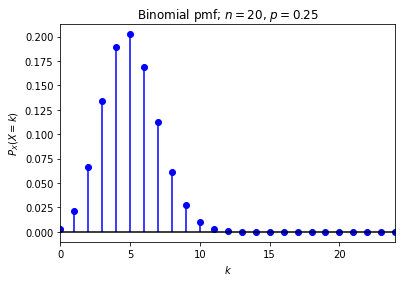

In [128]:
# set your parameters
p = 0.25
n = 20

k = range(int(1.25 * n))

# create and plot the pmf
X = stats.binom.pmf(k, n, p)

plt.stem(k, X, linefmt="b", markerfmt="ob", basefmt="k")
plt.title("Binomial pmf; $n = {}$, $p = {}$".format(n, p))
plt.ylabel("$P_X(X = k)$")
plt.xlabel("$k$")
plt.xlim([k[0], k[-1]])

Let us now examine a *continuous* distribution, and one of the most famous one we've been working with for a while.

### Gaussian (continuous)
The *Gaussian* distribution encodes a population with mean `μ` and standard deviation `σ`. The *pdf* is

<center>$f_X(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$.</center>

Note that the above is **not** a probability! In a practical scenario, the Gaussian distribution could model the grades of a class; the population could have a mean of `μ = 90` with a standard deviation of `σ = 3` (which would mean that almost everyone got a grade between `81` and `99`). Plot the pdf of the Gaussian below.

(75.0, 105.0)

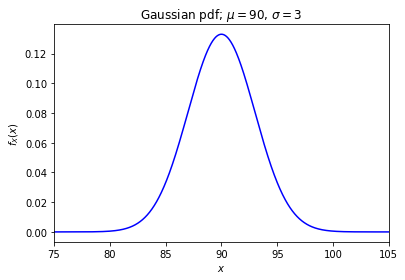

In [133]:
# set your parameters
mu = 90
sigma = 3

x = np.linspace(75, 105, 1000)

# create and plot the pmf
X = stats.norm.pdf(x, mu, sigma)

plt.plot(x, X, 'b')
plt.title("Gaussian pdf; $\mu = {}$, $\sigma = {}$".format(mu, sigma))
plt.ylabel("$f_X(x)$")
plt.xlabel("$x$")
plt.xlim([x[0], x[-1]])

## Central Limit Theorem

The *Central Limit Theorem (CLT)* essentially says that the **average** of random variables $X_1, X_2, \ldots, X_n$, where the r.v.s can follow *any* distribution with mean $\mu$ and variance $\sigma^2$ will converge to a *Gaussian* distribution with mean $\mu$ and variance $\frac{\sigma^2}{n}$.

Let us visualize the CLT for different distributions; namely the *uniform*, *exponential*, and *Gamma* distributions.

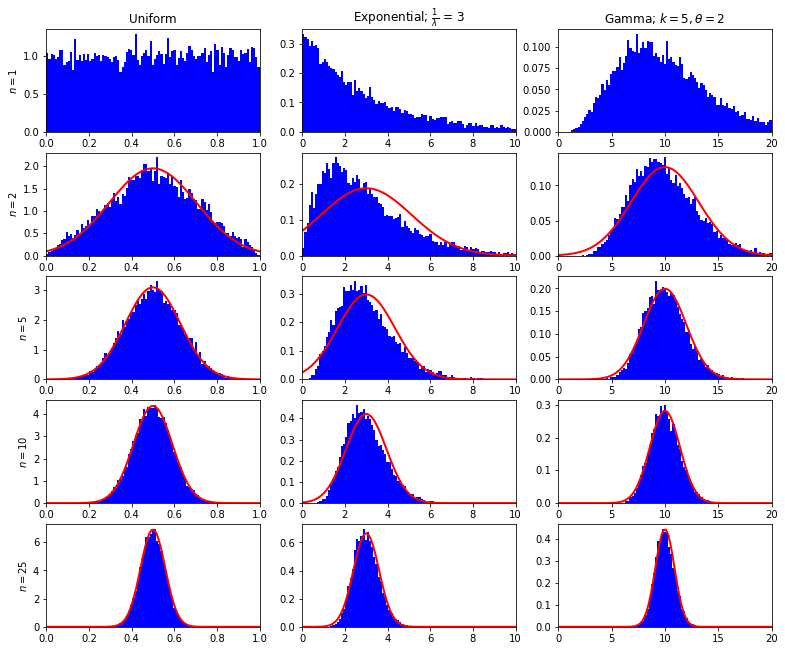

In [161]:
# this allows us to define the distributions as a lambda function
from functools import partial

# number of samples for each random variable
N = 10000

# distribution parameters
lambda_expo = 3
shape_gamma = 5
scale_gamma = 2

# definitions
variables = [1, 2, 5, 10, 25]
distributions = [partial(np.random.random), partial(np.random.exponential, lambda_expo), partial(np.random.gamma, shape_gamma, scale_gamma)]

len_var = len(variables)
len_dis = len(distributions)

# means and variances needed for the CLT
means = [0.5, lambda_expo, shape_gamma * scale_gamma]
variances = [1 / 12, lambda_expo ** 2, shape_gamma * scale_gamma ** 2]

# plotting helpers
number_bins = 100

titles = ["Uniform", r"Exponential; $\frac{1}{\lambda}$ = " + str(lambda_expo), r"Gamma; $k ={}, \theta = {}$".format(shape_gamma, scale_gamma)]
axis_ranges = [[0, 1], [0, 10], [0, 20]]
bin_ranges = [np.linspace(a, b, number_bins) for a, b in axis_ranges]

plt.figure(figsize=(4 * len_dis + 1, 2 * len_var + 1))

# generate the subplot
for column_index in range(len_var):
    for row_index in range(len_dis):
        plt.subplot(len_var, len_dis, column_index * len_dis + row_index + 1)
        
        plt.hist(np.mean(distributions[row_index]((N, variables[column_index])), 1), bin_ranges[row_index], density=True, color='blue')
        
        plt.xlim(axis_ranges[row_index])
        # plot the labels, if need be
        if row_index == 0:
            plt.ylabel("$n = {}$".format(variables[column_index]))
        
        if column_index == 0:
            plt.title(titles[row_index])
        else:
            # we need to create the CLT output
            clt = (1 / np.sqrt(2 * np.pi * variances[row_index] / variables[column_index])) * np.e ** (-(bin_ranges[row_index] - means[row_index]) ** 2 / (2 * variances[row_index] / variables[column_index]))
            plt.plot(bin_ranges[row_index], clt, 'r', linewidth=2)

Notice that the *convergence* of the average distribution to the predicted Gaussian by the CLT is *dependent* on the parent distribution!

## The Secretary Problem

In `Lab 1` you played with (and coded) the [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem). In this notebook, we will examine another famous problem in probability, named the [Secretary problem](https://en.wikipedia.org/wiki/Secretary_problem).

The setting is as follows; a boss wants to hire a new secretary. However, the boss doesn't want to spend too much time doing interviews, so they're willing to only interview `n` people. In this world, secretaries are highly sought after, so if the boss doesn't offer the job to a candidate right away, they can't go "back" rehire the candidate afterwards. The question is, what is the optimal strategy to guarantee, *in expectation*, the hiring of the best possible candidate?

As you might have guessed, this is not a very realistic scenario for secretary hires. One of the mathematicians working on this problem was rumored to be interested because he wanted to find an optimal strategy to choose which girlfriend to marry. It is safe to assume that if he broke up with someone, she wouldn't appreciate it too much if he want back months or years later and proposed to her out of the blue... 😅

So, in our case, let's say we are willing to examine `n = 100` people, and we'll assume we have a rating rubric where we can rate each applicant from `0` to `100`. Let's generate, randomly, the applicants.

Text(0.5, 1.0, 'Randomly generated applicants')

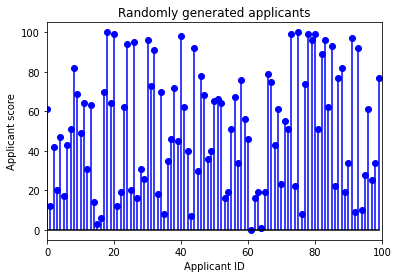

In [127]:
n = 100

# create the applicants
applicants = np.random.randint(0, 101, n)

# plot the candidates
plt.stem(applicants, linefmt="b", markerfmt="ob", basefmt="k")
plt.xlabel("Applicant ID")
plt.xlim([0, 100])
plt.ylabel("Applicant score")
plt.title("Randomly generated applicants")

So how would you choose an applicant? Remember, you're upposed to go through the applicants *linearly*, and you can't pick a candidate after you've skipped them. Devise a strategy of your own. You can use averages, differences, or you can simply choose one at random.

In [63]:
def simple_strategy(applicants):
    n = len(applicants)
    
    choice = np.random.randint(0, n)
    return choice

choice = simple_strategy(applicants)
print("I chose applicant {}, with a score of {}.".format(choice, applicants[choice]))

best_score = np.max(applicants)
best_applicants = [idx for idx in range(len(applicants)) if applicants[idx] == best_score]
print("The best applicant was {}, with a score of {}.".format(best_applicants[0], best_score))

I chose applicant 24, with a score of 4.
The best applicant was 73, with a score of 99.


Now, let's create a function that we'll evaluate our strategies with.

In [70]:
# how many times we'll run the experiment
N = 10000

def evaluate_strategy(strategy, n, N):
    correct = 0
    
    for idx in range(N):
        applicants = np.random.randint(0, 101, n)

        choice = strategy(applicants)
        best = np.max(applicants)
        if applicants[choice] == best:
            correct += 1
    return correct / N

percentage = evaluate_strategy(simple_strategy, n, N)
print("Our `simple_strategy` has a success rate of: {}".format(percentage))

Our `simple_strategy` has a success rate of: 0.0155


Is the number you see above expected? If you chose a simple random strategy, it should; you have about `n = 100` applicants, and you choose one at random, so we expect that we would "hit" the best applicant in about `1 / n` of the time. Now let us try the *optimal* strategy.

In [75]:
def optimal_strategy(applicants):
    n = len(applicants)
    
    best_score = None
    choice = None
    for idx in range(n):
        if idx <= int(n / np.e):
            if best_score == None:
                best_score = applicants[idx]
                
            if best_score < applicants[idx]:
                best_score = applicants[idx]
        else:
            if best_score < applicants[idx]:
                choice = idx
                break
    
    if choice == None:
        choice = n - 1
    
    return choice

percentage = evaluate_strategy(optimal_strategy, n, N)
print("Our `optimal_strategy` has a success rate of: {}".format(percentage))

Our `optimal_strategy` has a success rate of: 0.3595


That's a pretty significant jump! Can anybody guess what that number actually is? Also, we need to stress something here; this is the probability that we get the **BEST** possible candidate. Not a pretty good one, but the absolute *best*.

To put that number into perspective, let's create a different evaluation function, that checks if our candidate is in the **top k%**.

In [109]:
# choose our percentage
k = 10

def evaluate_strategy_top_k(strategy, k, n, N):
    correct = 0
    
    for idx in range(N):
        applicants = np.random.randint(0, 101, n)

        choice = strategy(applicants)
        
        max_sort = np.sort(applicants)[::-1]
        if applicants[choice] >= max_sort[int(n * k / 100)]:
            correct += 1
    return correct / N

percentage = evaluate_strategy_top_k(simple_strategy, k, n, N)
print("Our `simple_strategy` has a success rate of: {}".format(percentage))

percentage = evaluate_strategy_top_k(optimal_strategy, k, n, N)
print("Our `optimal_strategy` has a success rate of: {}".format(percentage))

Our `simple_strategy` has a success rate of: 0.121
Our `optimal_strategy` has a success rate of: 0.5698


The proofs for the *Secretary problem* are rather difficult for us to go through in detail; however they are based in probability. I believe that this problem is a great example of how probability can be used in practical settings in order to provide optimal solutions, and it highlights how powerful the results can be (again, try to ponder that about 30% of the time we get the **best** possible candidate).

I hope you enjoyed this week's notebook. Please take a minute to fill out the feedback [form](https://docs.google.com/forms/d/e/1FAIpQLScMtzXjjtdCOxseFZ77pP0Y0KhpJGHvoA5Y-rnGkb0l_VUW_A/viewform?usp=sf_link).